"""<br>
@Author: Prayag Bhoir<br>
@Date: 30-09-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 30-09-2024<br>
@Title : Python programs on Simple Linear Regression<br>
"""

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### Saperate the features.

In [5]:
X = df[['YearsExperience']]
y = df[['Salary']]
X.head(),y.head()

(   YearsExperience
 0              1.1
 1              1.3
 2              1.5
 3              2.0
 4              2.2,
     Salary
 0  39343.0
 1  46205.0
 2  37731.0
 3  43525.0
 4  39891.0)

In [22]:
#scale the values cause mse is too high and scales also too varis.
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

##### Split the dataset into traning and testing.

In [23]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

##### Create and train the model on train data

In [24]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

##### Make prediction on test data.

In [25]:
y_pred_scaled = model.predict(X_test_scaled)

##### Calculate the performance matrics.

In [26]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f"Mse = {mse}\nR2 = {r2}")

Mse = 0.06858932896507035
R2 = 0.9024461774180498


In [27]:
# De-scale the features
X_original = scaler_x.inverse_transform(X)
y_original = scaler_y.inverse_transform(y)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)
x_test_original = scaler_x.inverse_transform(X_test_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

##### Visualise the model

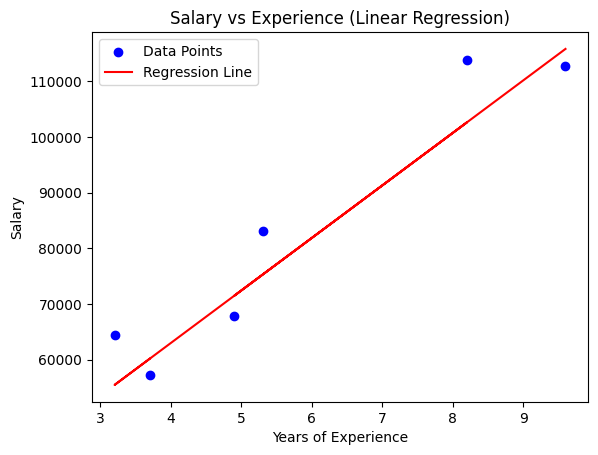

In [29]:
plt.scatter(x_test_original, y_test_original, color='blue', label="Data Points")
plt.plot(x_test_original, y_pred_original, color='red', label="Regression Line")
plt.title("Salary vs Experience (Linear Regression)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()